<a href="https://colab.research.google.com/github/Tiagogavinhos/Linear-Regression/blob/main/Linear_Regression_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#####################################################################
########## Medical Cost Personal Datasets
########## Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance
#####################################################################


In [2]:
#####################################################################
########## LOADING LIBRARIES
########## Those files will be used along with the script
#####################################################################

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [3]:
#####################################################################
########## STEP I
########## Loading the dataset
#####################################################################

#####################################################################
########## EXPLANATION OF HEADERS
########## Age: age of primary beneficiary
########## Sex: insurance contractor gender, female, male
########## Bmi: Body mass index - (kg / m ^ 2)  - Ideally 18.5 to 24.9
########## Children: Number of children covered by health insurance / Number of dependents
########## Smoker: Smoking
########## Region: the beneficiary's residential area in the US
########## Charges: Individual medical costs billed by health insurance
#####################################################################

import kagglehub
path = kagglehub.dataset_download("mirichoi0218/insurance")

Medical_Cost = pd.read_csv('/kaggle/input/insurance/insurance.csv')

# Show the first 5 rows of the dataset
print(Medical_Cost.head())


Using Colab cache for faster access to the 'insurance' dataset.
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
#####################################################################
########## STEP II
########## Description of Dataset
#####################################################################

Medical_Cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#####################################################################
########## STEP III
########## Checking a General Info from the Dataset
#####################################################################

Medical_Cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#####################################################################
########## STEP IV
########## Checking Missing Values
#####################################################################

print("\n")
print("Checking if there are missing values:")
print("\n")
print(Medical_Cost.isnull().sum())

# No Missing values



Checking if there are missing values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
#####################################################################
########## STEP V
########## Making some EDA - Exploratory Data Analysis
########## Summary of AGE x Sex (Man and Woman)
#####################################################################

# 2. Criar a tabela resumo
# Agrupamos por idade e sexo e contamos as ocorrências
tabela_resumo = Medical_Cost.groupby(['age', 'sex']).size().unstack(fill_value=0)
tabela_resumo.columns = ['Mulheres', 'Homens']
tabela_resumo = tabela_resumo.reset_index()

# Exibir a tabela resumo
print("--- TABELA RESUMO: QUANTIDADE POR IDADE E SEXO ---")
print(tabela_resumo.to_string(index=False)) # to_string mostra a tabela completa


--- TABELA RESUMO: QUANTIDADE POR IDADE E SEXO ---
 age  Mulheres  Homens
  18        33      36
  19        33      35
  20        14      15
  21        13      15
  22        13      15
  23        14      14
  24        14      14
  25        13      15
  26        13      15
  27        14      14
  28        14      14
  29        13      14
  30        13      14
  31        13      14
  32        13      13
  33        13      13
  34        13      13
  35        12      13
  36        12      13
  37        12      13
  38        13      12
  39        13      12
  40        13      14
  41        13      14
  42        13      14
  43        14      13
  44        14      13
  45        14      15
  46        14      15
  47        15      14
  48        15      14
  49        14      14
  50        14      15
  51        15      14
  52        15      14
  53        14      14
  54        14      14
  55        13      13
  56        13      13
  57        13      13
  58  

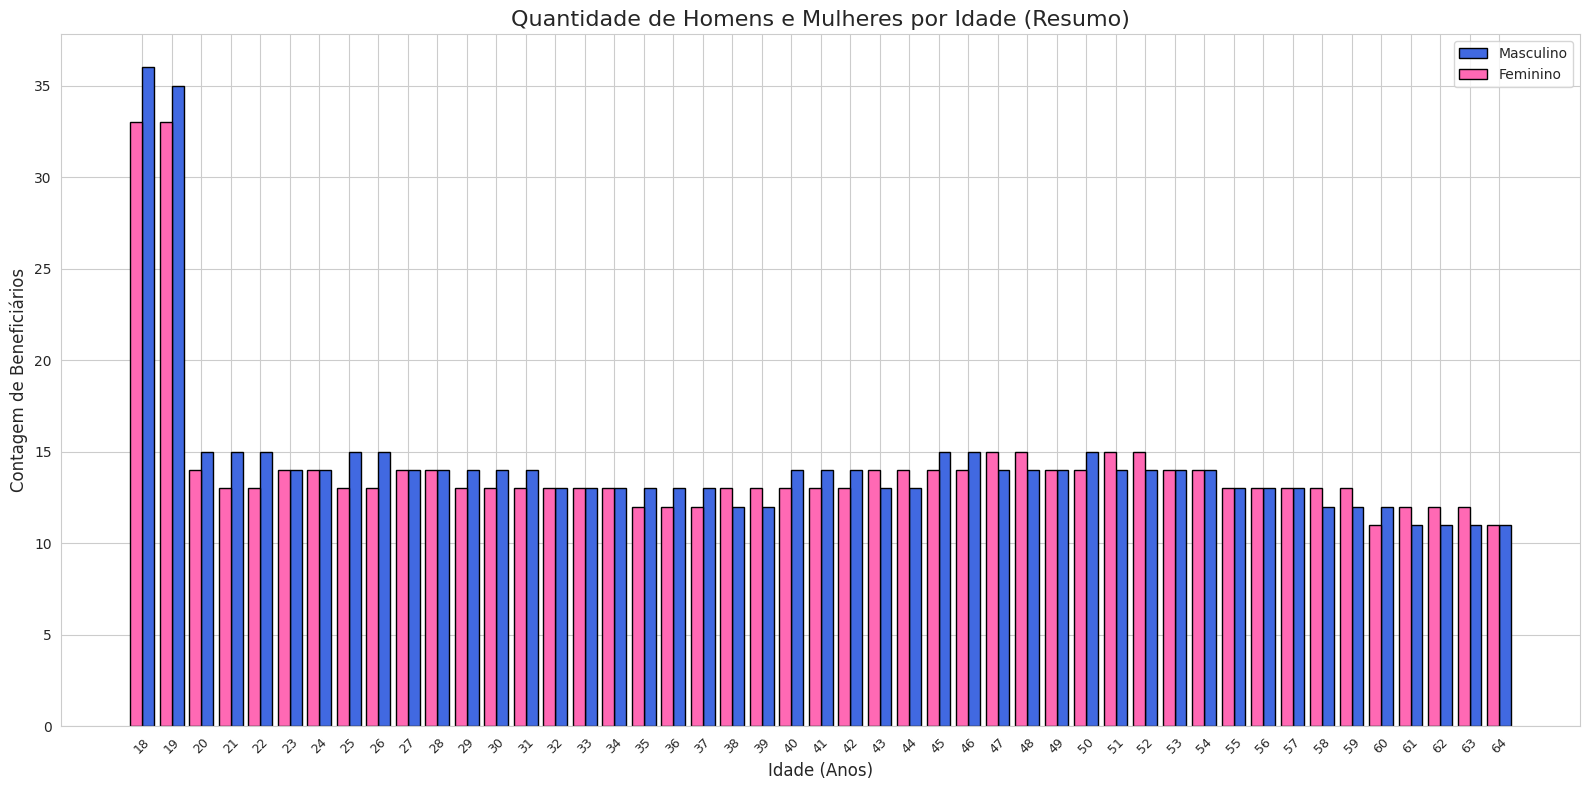

In [ ]:
#####################################################################
########## STEP V
########## Making some EDA - Exploratory Data Analysis
########## Ploting the previous summary of AGE x Sex (Man and Woman)
#####################################################################


# 1. Carregar e preparar os dados
# df = pd.read_csv('insurance.csv')
# tabela_resumo = df.groupby(['age', 'sex']).size().unstack(fill_value=0)
# tabela_resumo.columns = ['Mulheres', 'Homens']
# tabela_resumo = tabela_resumo.reset_index()

# 2. Configurar o gráfico
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Definir a largura das barras
largura = 0.4

# Plotar Homens (Azul) e Mulheres (Rosa/Vermelho) lado a lado
plt.bar(tabela_resumo['age'] + largura/2, tabela_resumo['Homens'],
        width=largura, label='Masculino', color='royalblue', edgecolor='black')

plt.bar(tabela_resumo['age'] - largura/2, tabela_resumo['Mulheres'],
        width=largura, label='Feminino', color='hotpink', edgecolor='black')

# 3. Exibir TODAS as idades no eixo X
# Criamos uma lista de 18 até a idade máxima encontrada no dataset
idades = range(int(tabela_resumo['age'].min()), int(tabela_resumo['age'].max()) + 1)
plt.xticks(idades, fontsize=9, rotation=45)

# Títulos e legendas
plt.title('Quantidade de Homens e Mulheres por Idade (Resumo)', fontsize=16)
plt.xlabel('Idade (Anos)', fontsize=12)
plt.ylabel('Contagem de Beneficiários', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


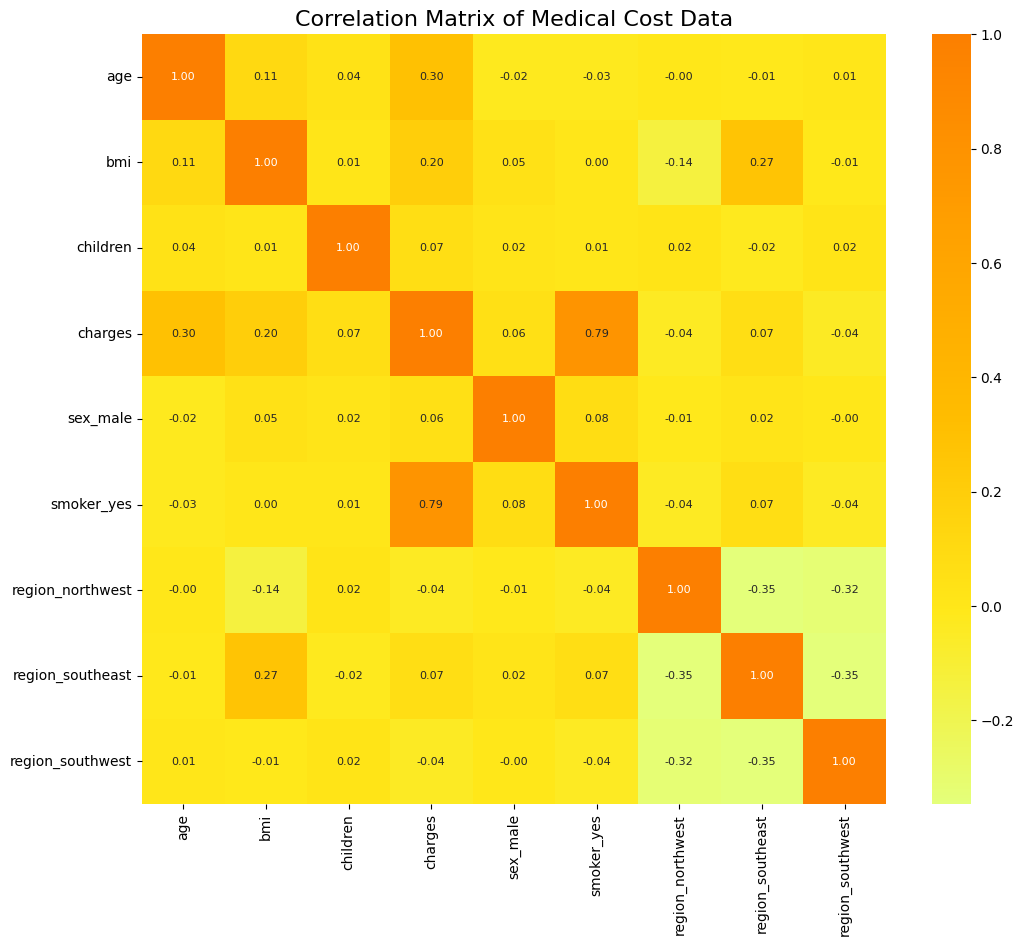

In [9]:
#####################################################################
########## STEP VI
########## Making some EDA - Exploratory Data Analysis
########## Checking the correlation
#####################################################################

# Convert categorical variables into numerical using one-hot encoding
Medical_Cost_encoded = pd.get_dummies(Medical_Cost, columns=['sex', 'smoker', 'region'], drop_first=True)

# correlation plot on the encoded DataFrame
corr = Medical_Cost_encoded.corr()

plt.figure(figsize=(12, 10)) # Increase the figure size for better readability
sns.heatmap(corr, cmap = 'Wistia', annot= True, fmt=".2f", annot_kws={"fontsize":8}); # Format annotations to 2 decimal places and adjust font size
plt.title('Correlation Matrix of Medical Cost Data', fontsize=16)
plt.show()



In [ ]:
#####################################################################
########## STEP VII
########## Linear Regression Model
#####################################################################

#####################################################################
########## After the analyze of Correlation Matrix on the previous
########## picture. Let's investigate this relantioship
#####################################################################

#####################################################################
########## Creating a dataset for test and train
#####################################################################

X = Medical_Cost_encoded.drop('charges',axis=1) # Independet variable
y = Medical_Cost_encoded['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
#####################################################################
########## STEP VIII
########## Linear Regression Model
#####################################################################

#####################################################################
########## After the analyze of Correlation Matrix on the previous
########## picture. Let's investigate this relantioship
#####################################################################

#####################################################################
########## Linear Regression
########## Fitting a regression model
#####################################################################

regression = LinearRegression()
regression.fit(X_train, y_train)
predictions = regression.predict(X_test)

# Ordinary Least Squares (OLS): minimize RSS
# R-squared

value_score = regression.score(X_test, y_test)
print(f"The value of R-squared is: {value_score*100:.2f}%")


The value of R-squared is: 72.93%


In [ ]:
#####################################################################
########## STEP IX
########## Linear Regression Model
#####################################################################

#####################################################################
########## Let's check if the cross validation is more applicable
#####################################################################

#####################################################################
########## It was be evaluated for k = 5 and k = 10
#####################################################################

kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)
regression = LinearRegression()
cv_results_5 = cross_val_score(regression, X, y, cv=kf_5)

kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)
regression = LinearRegression()
cv_results_10 = cross_val_score(regression, X, y, cv=kf_10)

kf_15 = KFold(n_splits=15, shuffle=True, random_state=42)
regression = LinearRegression()
cv_results_15 = cross_val_score(regression, X, y, cv=kf_10)

print(f"Average R-squared for k=5: {cv_results_5.mean()*100:.2f}%")
print(f"Average R-squared for k=10: {cv_results_10.mean()*100:.2f}%")
print(f"Average R-squared for k=15: {cv_results_15.mean()*100:.2f}%")

# It was get a better result using k=5 (74.02%)

Average R-squared for k=5: 74.02%
Average R-squared for k=10: 73.90%
Average R-squared for k=15: 73.90%


In [ ]:
#####################################################################
########## STEP X
########## Linear Regression Model
#####################################################################

#####################################################################
########## Let's see if Ridge regression is better then the previous
########## models
#####################################################################

scores_r = []
for alpha in [0.1, 1.0, 15.0, 20.0, 50.0, 100.0, 1000.0]:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  y_pred_ridge = ridge.predict(X_test)
  scores_r.append(ridge.score(X_test, y_test))
  print(f"Value of R-squared for alpha = {alpha}: {scores_r[-1]*100:.2f}%")

# Cross-Validation continues to be better


Value of R-squared for alpha = 0.1: 72.93%
Value of R-squared for alpha = 1.0: 72.98%
Value of R-squared for alpha = 15.0: 73.15%
Value of R-squared for alpha = 20.0: 73.00%
Value of R-squared for alpha = 50.0: 70.84%
Value of R-squared for alpha = 100.0: 65.51%
Value of R-squared for alpha = 1000.0: 28.09%


In [ ]:
#####################################################################
########## STEP XI
########## Linear Regression Model
#####################################################################

#####################################################################
########## Let's see if Lasso regression is better then the previous
########## models
#####################################################################

scores_l = []
for alpha in [0.1, 1.0, 15.0, 20.0, 50.0, 100.0, 1000.0]:
  lasso = Lasso (alpha=alpha)
  lasso.fit(X_train, y_train)
  lasso_pred = lasso.predict(X_test)
  scores_l.append(lasso.score(X_test, y_test))
  print(f"Value of R-squared for alpha = {alpha}: {scores_l[-1]*100:.2f}%")


# Cross-Validation continues to be better



Value of R-squared for alpha = 0.1: 72.93%
Value of R-squared for alpha = 1.0: 72.94%
Value of R-squared for alpha = 15.0: 73.03%
Value of R-squared for alpha = 20.0: 73.06%
Value of R-squared for alpha = 50.0: 73.19%
Value of R-squared for alpha = 100.0: 73.31%
Value of R-squared for alpha = 1000.0: 70.81%


In [ ]:
#####################################################################
########## STEP XII
########## Linear Regression Model
#####################################################################

#####################################################################
########## Finding a coeficinet and intercepto of model
#####################################################################


regression = LinearRegression()
regression.fit(X_train, y_train)

# Get the slope (coefficient) and intercept
slope = regression.coef_[0]
intercept = regression.intercept_

print(f"Intercept: {intercept:.4f}")
print(f"Slope for the first feature: {slope:.4f}")

Intercept: -11804.7095
Slope for the first feature: 245.6793
